## Task-D: Collinear features and their effect on linear models

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving task_d.csv to task_d.csv


In [ ]:
data = pd.read_csv('task_d.csv')

In [ ]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [ ]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values
X.shape, Y.shape


((100, 7), (100,))

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

Text(0.5, 1.0, 'Correlation Heatmap')

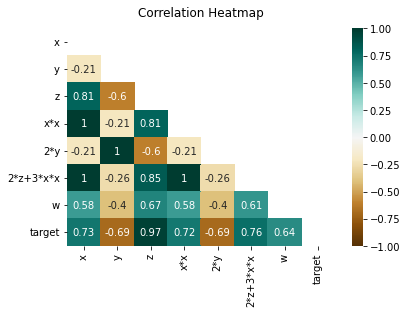

In [ ]:
data.corr()
heatmap = sns.heatmap(data.corr(), mask=np.triu(np.array(data.corr(), dtype=np.bool)), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters = {'C':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100,1000]}
LR = LogisticRegression(penalty='l2', dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf = GridSearchCV(LR, parameters, cv=10, scoring='roc_auc')
clf.fit(X,Y)

print('Best Hyperparameters: %s' % clf.best_params_)


Best Hyperparameters: {'C': 1e-05}


In [ ]:
from sklearn.metrics import roc_curve, auc
clf = LogisticRegression(C=1e-05 ,penalty='l2', dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf.fit(X,Y)

y_pred = clf.predict(X) 
fpr, tpr, thresholds = roc_curve(Y, y_pred)
print('Best Model Accuracy: %s' % str(auc(fpr, tpr)))
print('Best Model Weights: %s' % clf.coef_)
feature_lst = list(data.columns)[:7]
feature_dict = {}
for i,name in enumerate(feature_lst):
  feature_dict[name] = clf.coef_[0][i]

sorted(feature_dict,reverse=True)[:4]


Best Model Accuracy: 1.0
Best Model Weights: [[ 0.00036369 -0.000345    0.00048449  0.00035933 -0.000345    0.00038189
   0.00032048]]


['z', 'y', 'x*x', 'x']

In [ ]:
X_new = X+0.01
clf.fit(X_new,Y)

y_pred = clf.predict(X) 
y_pred = batch_predict(clf, X_new)
fpr, tpr, thresholds = roc_curve(Y, y_pred)
print('New Model Accuracy: %s' % str(auc(fpr, tpr)))
print('New Model Weights: %s' % clf.coef_)

New Model Accuracy: 1.0
New Model Weights: [[ 0.00036369 -0.000345    0.00048449  0.00035933 -0.000345    0.00038189
   0.00032048]]
